# Objective

### Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways – higher ## priority inrecommendations sections (“Similar apps”, “You might also like”, “New and updated games”).These will also get a boost in visibility in search results. This feature will help bring more attention to newer apps that have potential.The task is to understand what makes an app perform well - size? price? category? multiple factors together? Analyze the data and present your insights in a format consumable by business – the final output of the analysis would be presented to business as insights withsupporting data/visualizations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
play=pd.read_csv("playstore-analysis (2) (1).csv")

In [3]:
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


1. - Data clean up – Missing value treatment
      - a. Drop records where rating is missing since rating is our target/study variable
      - b. Check the null values for the Android Ver column.
          - i. Are all 3 records having the same problem?
          - ii. Drop the 3rd record i.e. record for “Life Made WIFI …”
          - iii. Replace remaining missing values with the mode
      - c. Current ver – replace with most common value

In [4]:
play.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [108]:
play[play['Rating'].isnull()]                        # Checking for null value rows in Rating column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7700.0,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9800.0,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9600.0,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [6]:
play.shape                                          #original array shape

(10841, 13)

In [3]:
play1=play.dropna(subset = ['Rating'],how='all')               #dropping all records having null Rating values

In [68]:
play1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
play1.dropna(subset = ['Rating'],how='all').shape    #shape of array after removing rows with null values in 'Rating' column

(9367, 13)

In [110]:
play1[play1['Android Ver'].isnull()]                 #Checking the null values for the Android Ver column.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
#We can see that all 3 records have null values in the "Android Ver" column

In [4]:
play2=play1.drop([10472],axis=0)                       #dropping the 3rd record by specifying the name i.e. 10472

In [5]:
play2[play2['Android Ver'].isnull()]                   #here we can see that only two values remain

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [6]:
mo=play2['Android Ver'].mode()[0]           #Calculating mode of column "Android Ver" and assigning it to a variable name "mo"

In [7]:
print(mo)

4.1 and up


In [8]:
play2['Android Ver']=play2['Android Ver'].fillna(play2['Android Ver'].mode()[0])       #replacing null values with mode

In [ ]:
# below we can check the two columns where "NaN" is replaced with the mode "4.1 and up"

In [9]:
play2[(play2['App']=='[substratum] Vacuum: P') | (play2['App']=='Pi Dark [substratum]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


In [10]:
play2['Current Ver'].mode()[0]                #calculating mode for most common value in "Current Ver" column

'Varies with device'

In [11]:
play2['Current Ver'] = play2['Current Ver'].mode()[0]            #replacing values in "Current Ver" with it's mode

In [79]:
play2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


2. Data clean up – correcting the data types
    - a. Which all variables need to be brought to numeric types?
    - b. Price variable – remove $ sign and convert to float
    - c. Installs – remove ‘,’ and ‘+’ sign, convert to integer
    - d. Convert all other identified columns to numeric

In [80]:
play2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [58]:
# Here we can see that only "Rating" and "Size" columns have numeric data type whereas reviews,Installs and Price are objects.
# We need to bring reviews,Installs and Price to numeric data type.

In [12]:
play2['Price']=[x.strip("$") for x in play2['Price']]                   #removing "$" from Price column

In [12]:
play2[(play2['App']=='Advanced EX for KIA')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10047,Advanced EX for KIA,TOOLS,3.3,257,160.0,"5,000+",Paid,4.99,Everyone,Tools,"March 14, 2015",Varies with device,1.6 and up


In [13]:
play2['Price']=play2['Price'].astype('float64')           #converting object "Price" into datatype float

In [105]:
play2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [14]:
play2['Installs']=[x.strip("+") for x in play2['Installs']] 

In [15]:
play2['Installs']=[x.strip(",") for x in play2['Installs']] 

In [16]:
play2['Installs']=play2['Installs'].str.replace(",","")

In [126]:
play2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [17]:
play2['Installs']=play2['Installs'].astype('int64')  

In [56]:
play2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


In [18]:
play2['Reviews']=play2['Reviews'].astype('int64')  

In [58]:
play2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.3+ MB


3. Sanity checks – check for the following and handle accordingly
    - a. Avg. rating should be between 1 and 5, as only these values are allowed on the playstore.
        - i. Are there any such records? Drop if so.
    - b. Reviews should not be more than installs as only those who installed can review the app.
        - i. Are there any such records? Drop if so.

In [19]:
play2[(play2['Rating']<=1.0) | (play2['Rating']>=5.0)]            #identifying apps with rating not between 1 and 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,"June 26, 2018",Varies with device,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4400.0,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",Varies with device,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",Varies with device,4.4 and up
625,House party - live chat,DATING,1.0,1,9200.0,10,Free,0.0,Mature 17+,Dating,"July 31, 2018",Varies with device,4.0.3 and up
633,Spine- The dating app,DATING,5.0,5,9300.0,500,Free,0.0,Teen,Dating,"July 14, 2018",Varies with device,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",Varies with device,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7900.0,1000,Free,0.0,Everyone,Lifestyle,"December 31, 2017",Varies with device,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,"March 5, 2018",Varies with device,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,1000,Free,0.0,Teen,Education,"June 27, 2018",Varies with device,4.1 and up


In [18]:
play2[(play2['Rating']<=1.0) | (play2['Rating']>=5.0)].index               #index values of the identified apps

Int64Index([  329,   612,   615,   625,   633,   636,   640,   654,  1028,
             1030,
            ...
            10629, 10656, 10659, 10690, 10697, 10721, 10742, 10776, 10820,
            10837],
           dtype='int64', length=290)

In [ ]:
# Now we drop the rows identified by index values and assign a new name to the updated dataframe

In [19]:
play3=play2.drop(index=play2[(play2['Rating']<=1.0) | (play2['Rating']>=5.0)].index)

In [130]:
play3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",Varies with device,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:

play3['Price']=play3['Price'].astype('float64') 
play3['Installs']=play3['Installs'].astype('int64') 
play3['Reviews']=play3['Reviews'].astype('int64')  


In [65]:
play3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9076 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9076 non-null   object 
 1   Category        9076 non-null   object 
 2   Rating          9076 non-null   float64
 3   Reviews         9076 non-null   int64  
 4   Size            9076 non-null   float64
 5   Installs        9076 non-null   int64  
 6   Type            9076 non-null   object 
 7   Price           9076 non-null   float64
 8   Content Rating  9076 non-null   object 
 9   Genres          9076 non-null   object 
 10  Last Updated    9076 non-null   object 
 11  Current Ver     9076 non-null   object 
 12  Android Ver     9076 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [22]:
play3[(play3['Reviews'])>(play3['Installs'])].index        # Checking the dataframe for rows with Reviews > Installs

Int64Index([4663], dtype='int64')

In [69]:
play3.loc[4663]                  #here we can see that reviews > installs

App               Alarmy (Sleep If U Can) - Pro
Category                              LIFESTYLE
Rating                                      4.8
Reviews                                   10249
Size                               21516.529524
Installs                                  10000
Type                                       Paid
Price                                      2.49
Content Rating                         Everyone
Genres                                Lifestyle
Last Updated                      July 30, 2018
Current Ver                  Varies with device
Android Ver                  Varies with device
Name: 4663, dtype: object

In [21]:
play4=play3.drop([4663],axis=0)                      # Dropping the row

In [23]:
play4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


4. Identify and handle outliers –
    - a. Price column
        - i. Make suitable plot to identify outliers in price
        
        - ii. Do you expect apps on the play store to cost $200? Check out these cases
        
        - iii. After dropping the useless records, make the suitable plot again to identify outliers
        
        - iv. Limit data to records with price < $30

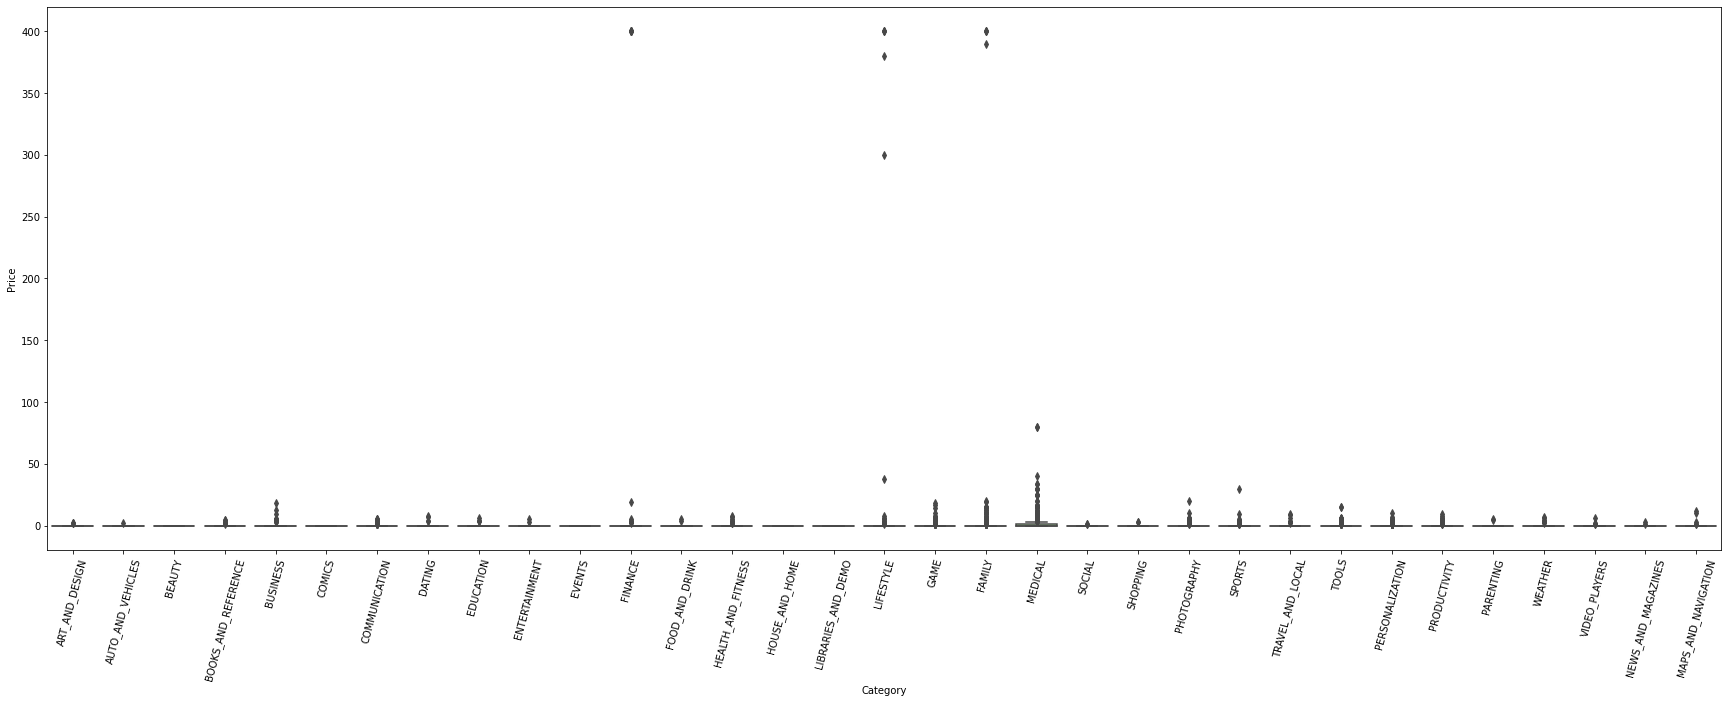

In [73]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Category',y='Price',data=play4,palette='rainbow')
plt.xticks(rotation=75)
plt.show()

In [136]:
play4[(play4['Price']>=200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",Varies with device,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",Varies with device,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",Varies with device,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",Varies with device,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",Varies with device,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",Varies with device,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",Varies with device,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",Varies with device,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",Varies with device,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",Varies with device,4.4 and up


In [137]:
play4[(play4['Price']>=200)].info()              # There are 15 apps with price above $200

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 4197 to 5373
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             15 non-null     object 
 1   Category        15 non-null     object 
 2   Rating          15 non-null     float64
 3   Reviews         15 non-null     int64  
 4   Size            15 non-null     float64
 5   Installs        15 non-null     int64  
 6   Type            15 non-null     object 
 7   Price           15 non-null     float64
 8   Content Rating  15 non-null     object 
 9   Genres          15 non-null     object 
 10  Last Updated    15 non-null     object 
 11  Current Ver     15 non-null     object 
 12  Android Ver     15 non-null     object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.6+ KB


In [22]:
play5=play4.drop(index=play4[(play4['Price']>=200)].index)         #Dropping apps with Price >= $200

In [25]:
play5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",Varies with device,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


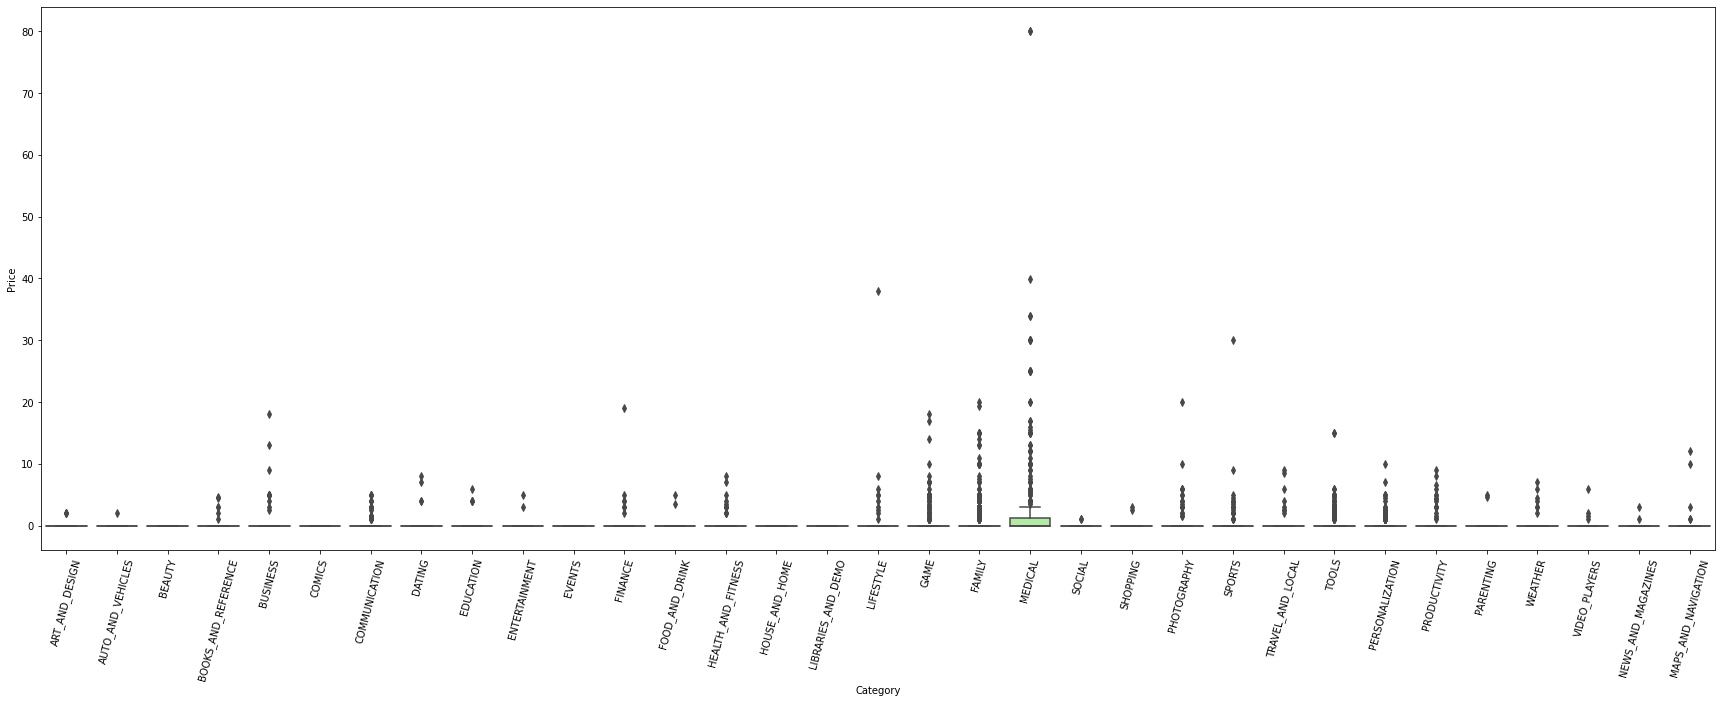

In [72]:
plt.figure(figsize=(30,10))
sns.boxplot(x='Category',y='Price',data=play5,palette='rainbow')
plt.xticks(rotation=75)
plt.show()

In [140]:
play5[(play5['Price']>=30)]                             #identifying apps with price >= $30

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",Varies with device,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",Varies with device,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",Varies with device,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",Varies with device,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",Varies with device,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",Varies with device,4.0.3 and up


In [23]:
play6=play5.drop(index=play5[(play5['Price']>=30)].index)        #dropping apps with price >= $30
play6

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",Varies with device,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


4. Identify and handle outliers –
    - b. Reviews column
        - i. Make suitable plot
        - ii. Limit data to apps with < 1 Million reviews

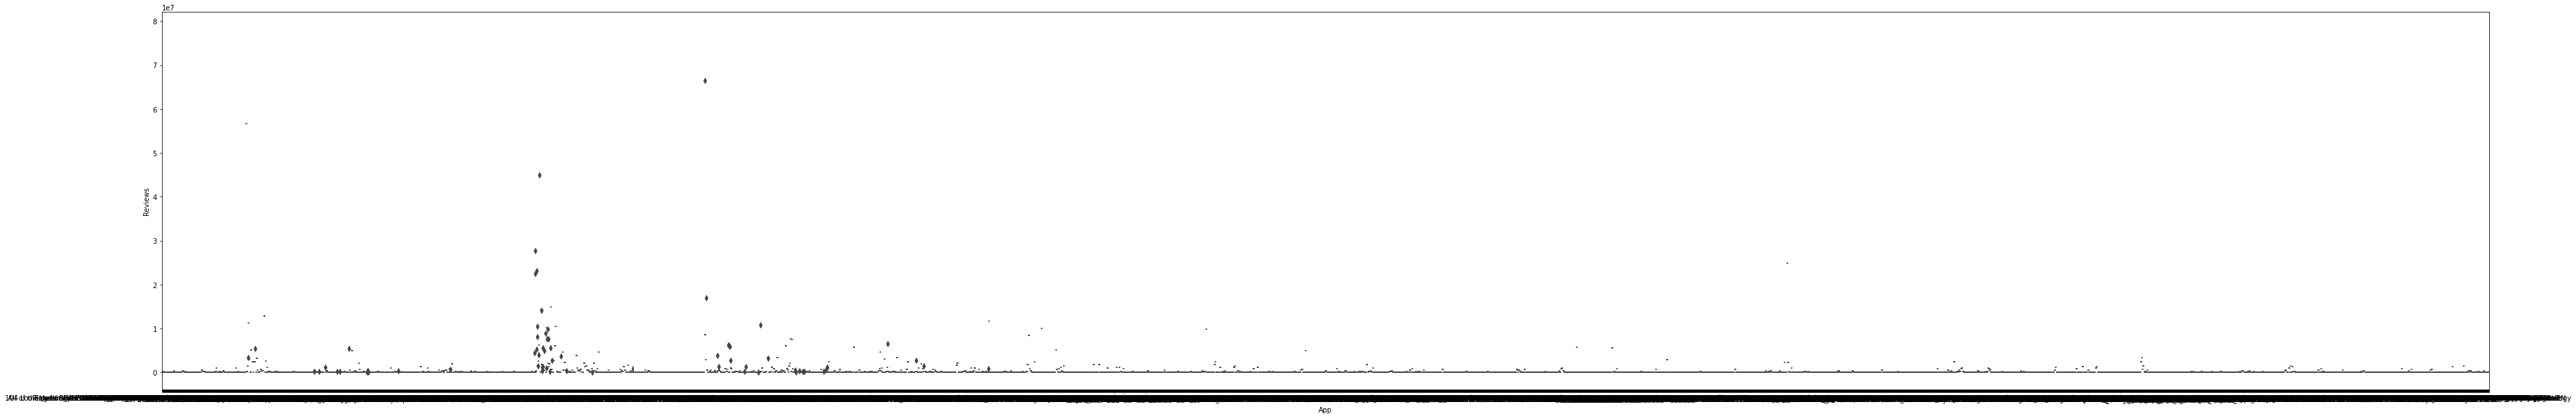

In [71]:
plt.figure(figsize=(60,10))                      #making a boxplot with Apps on x-axis and Reviews on y-axis
sns.boxplot(x='App',y='Reviews',data=play6)

plt.show()

In [24]:
play7=play6.drop(index=play5[(play5['Reviews']>=1000000)].index)    #limiting apps with < 1 Million reviews
play7

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",Varies with device,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


4. Identify and handle outliers –
    - c. Installs
        - i. What is the 95th percentile of the installs?
        - ii. Drop records having a value more than the 95th percentile

In [28]:
np.percentile(play7['Installs'],[95])              #Calculating 95th percentile of the column installs

array([10000000.])

In [146]:
play7[(play7['Installs']>10000000)]                #These apps have Installs > 10000000 i.e. more than the 95th percentile.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,21516.529524,50000000,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,21516.529524,50000000,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
225,Secure Folder,BUSINESS,3.8,14760,8600.000000,50000000,Free,0.0,Everyone,Business,"January 31, 2018",Varies with device,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.000000,50000000,Free,0.0,Teen,Action,"August 8, 2018",Varies with device,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.000000,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",Varies with device,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.000000,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",Varies with device,2.3 and up
10549,Toy Truck Rally 3D,GAME,4.0,301895,25000.000000,50000000,Free,0.0,Everyone,Racing,"May 23, 2018",Varies with device,4.1 and up


In [25]:
play8=play7.drop(index=play7[(play7['Installs']>10000000)].index)     #dropping identified data
play8                            

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.000000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",Varies with device,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",Varies with device,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?
    - a. How do you explain this?
    - b. What is the implication of this on your analysis?

<AxesSubplot:xlabel='Rating', ylabel='Density'>

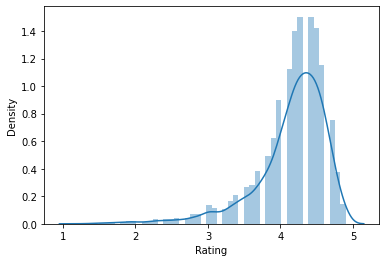

In [151]:
sns.distplot(play8['Rating'])

    - We can see that the distribution of ratings is negatively skewed(left skewed) and is more towards the higher values.
    - This means that most of the apps in the play store have generally favourable ratings.
    - This will imply that these apps are promising and will get a boost in visibility as stated in the objective.

6. What are the top Content Rating values?
    - a. Are there any values with very few records?
    - b. If yes, drop those as they won’t help in the analysis

In [28]:
play8['Content Rating'].value_counts()         # Here we can see that "Adults only 18+" & "Unrated" have very few records. 

Everyone           6533
Teen                879
Mature 17+          405
Everyone 10+        330
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [ ]:
# So now we drop these two categories from "Content Rating"

In [26]:
play9=play8.drop(index=play2[(play2['Content Rating']=='Adults only 18+') | (play2['Content Rating']=='Unrated')].index)
play9

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",Varies with device,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",Varies with device,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",Varies with device,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",Varies with device,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.000000,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",Varies with device,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.000000,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",Varies with device,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",Varies with device,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",Varies with device,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


7. Effect of size on rating
    - a. Make a joinplot to understand the effect of size on rating
    - b. Do you see any patterns?
    - c. How do you explain the pattern?

In [30]:
sns.set_style('darkgrid')

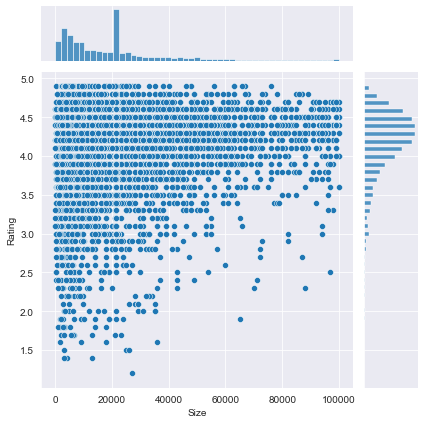

In [37]:
sns.jointplot(x='Size',y='Rating',data=play9)

**We can see that majority of the apps which have size above 40000 have a rating above average i.e. above 3. So there is a goodcorrelation between Size and Rating i.e. if Size increases then Rating also increases.**

8. Effect of price on rating
    - a. Make a jointplot (with regression line)
    - b. What pattern do you see?
    - c. How do you explain the pattern?
    - d. Replot the data, this time with only records with price > 0
    - e. Does the pattern change?
    - f. What is your overall inference on the effect of price on the rating

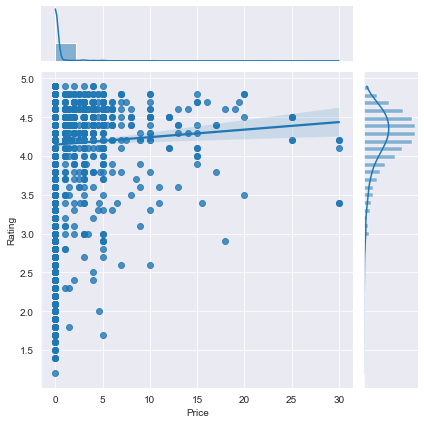

In [39]:
sns.jointplot(x='Price',y='Rating',data=play9,kind='reg')

**Most of the apps having price above 10 are rated above 3. There is some positive correlation between price and rating.**

In [68]:
play9[(play9['Price']==0.0)].index                    # Identifying apps with Price=$0

Int64Index([    0,     1,     2,     4,     5,     6,     7,     8,     9,
               10,
            ...
            10827, 10828, 10829, 10830, 10832, 10833, 10834, 10836, 10839,
            10840],
           dtype='int64', length=7554)

In [27]:
play10=play9.drop(index=play9[(play9['Price']==0)].index)           #Dropping the app records with zero price.
play10

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",Varies with device,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",Varies with device,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",Varies with device,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",Varies with device,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",Varies with device,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Solitaire+,GAME,4.6,11235,21516.529524,100000,Paid,2.99,Everyone,Card,"July 30, 2018",Varies with device,Varies with device
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.000000,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",Varies with device,4.0.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.000000,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",Varies with device,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.000000,10000,Paid,16.99,Teen,Action,"February 27, 2015",Varies with device,5.0 and up


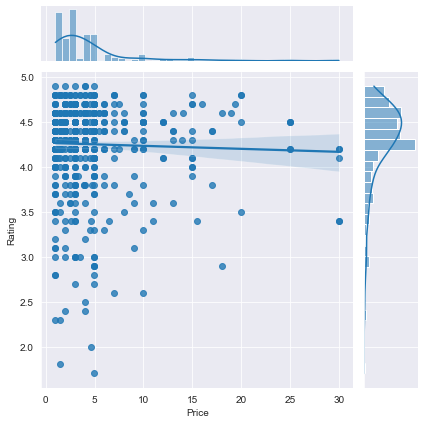

In [70]:
sns.jointplot(x='Price',y='Rating',data=play10,kind='reg')

    - After removing the records with zero price, we can see that there is a slight negative correlation between price and             rating i.e. if price increases the rating decreases.
    - Overall we saw that due to the large number of free apps, the rating was affected as it motivated people to give a 
      higher rating and thus a positive correlation was formed. 
    - But as soon as the free apps are removed the plot changed and the correlation became negative.
    This shows that price is adeciding factor for people to give a favourable rating. 

9. Look at all the numeric interactions together –
    - a. Make a pairplort with the columns - 'Reviews', 'Size', 'Rating', 'Price'

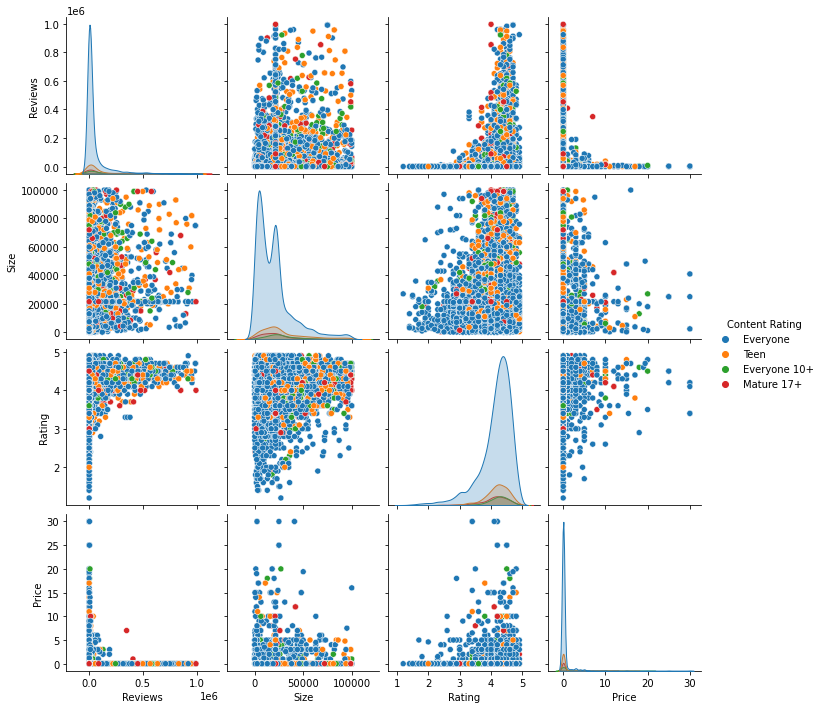

In [31]:
sns.pairplot(play9,vars=['Reviews','Size','Rating','Price'],hue='Content Rating')

10. Rating vs. content rating
    - a. Make a bar plot displaying the rating for each content rating
    - b. Which metric would you use? Mean? Median? Some other quantile?
    - c. Choose the right metric and plot

In [83]:
play9.groupby('Content Rating').Rating.mean()                 # Calculating mean rating of each content rating category

Content Rating
Everyone        4.146763
Everyone 10+    4.213939
Mature 17+      4.082963
Teen            4.178271
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

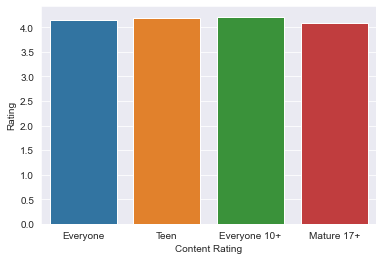

In [84]:
sns.barplot(x='Content Rating',y='Rating',ci=None,data=play9)

**We can see that the mean of each 'Content Rating' is visualised on the barplot which we can check from the mean calculated above.**

In [85]:
play9.groupby('Content Rating').Rating.describe()            # Check standard deviation

,count,mean,std,min,25%,50%,75%,max
Content Rating,,,,,,,,
Everyone,6533.0,4.146763,0.520493,1.2,4.0,4.3,4.500,4.9
Everyone 10+,330.0,4.213939,0.381550,1.8,4.1,4.3,4.475,4.9
Mature 17+,405.0,4.082963,0.485871,1.9,3.9,4.2,4.400,4.9
Teen,879.0,4.178271,0.396130,2.0,4.0,4.2,4.500,4.9


<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

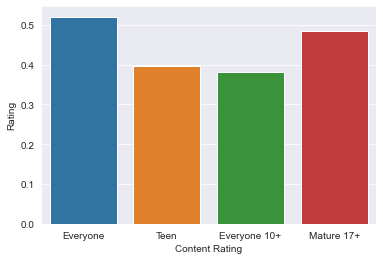

In [87]:
sns.barplot(x='Content Rating',y='Rating',ci=None,data=play9,estimator=np.std)

**Here we have taken the standard deviation as estimator to show the deviations on the barplot which is same as calculated above.**

11. Content rating vs. size vs. rating – 3 variables at a time
    - a. Create 5 buckets (20% records in each) based on Size
    - b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination
    - c. Make a heatmap of this
        - i. Annotated
        - ii. Greens color map
    - d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

<AxesSubplot:xlabel='Size'>

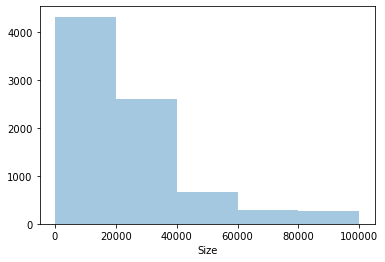

In [75]:
sns.distplot(play9.Size,bins=5,kde=False)                   # a-Creating 5 bins for size.

In [43]:
play9.groupby('Content Rating').Size.quantile([0.2])       # b- Calculating 20th percentile for each for Content Rating vs Size

Content Rating     
Everyone        0.2     4100.0
Everyone 10+    0.2    18000.0
Mature 17+      0.2     8080.0
Teen            0.2     9100.0
Name: Size, dtype: float64

In [ ]:
# c- Below is the annotated and green color heatmap.

<AxesSubplot:>

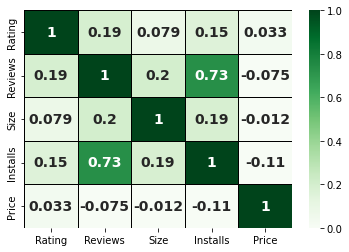

In [62]:
sns.heatmap(play9.corr(),cmap='Greens',vmin=0,vmax=1,annot=True,linewidth=1,linecolor='black',
            annot_kws={'fontsize':14,'fontweight':'bold'})

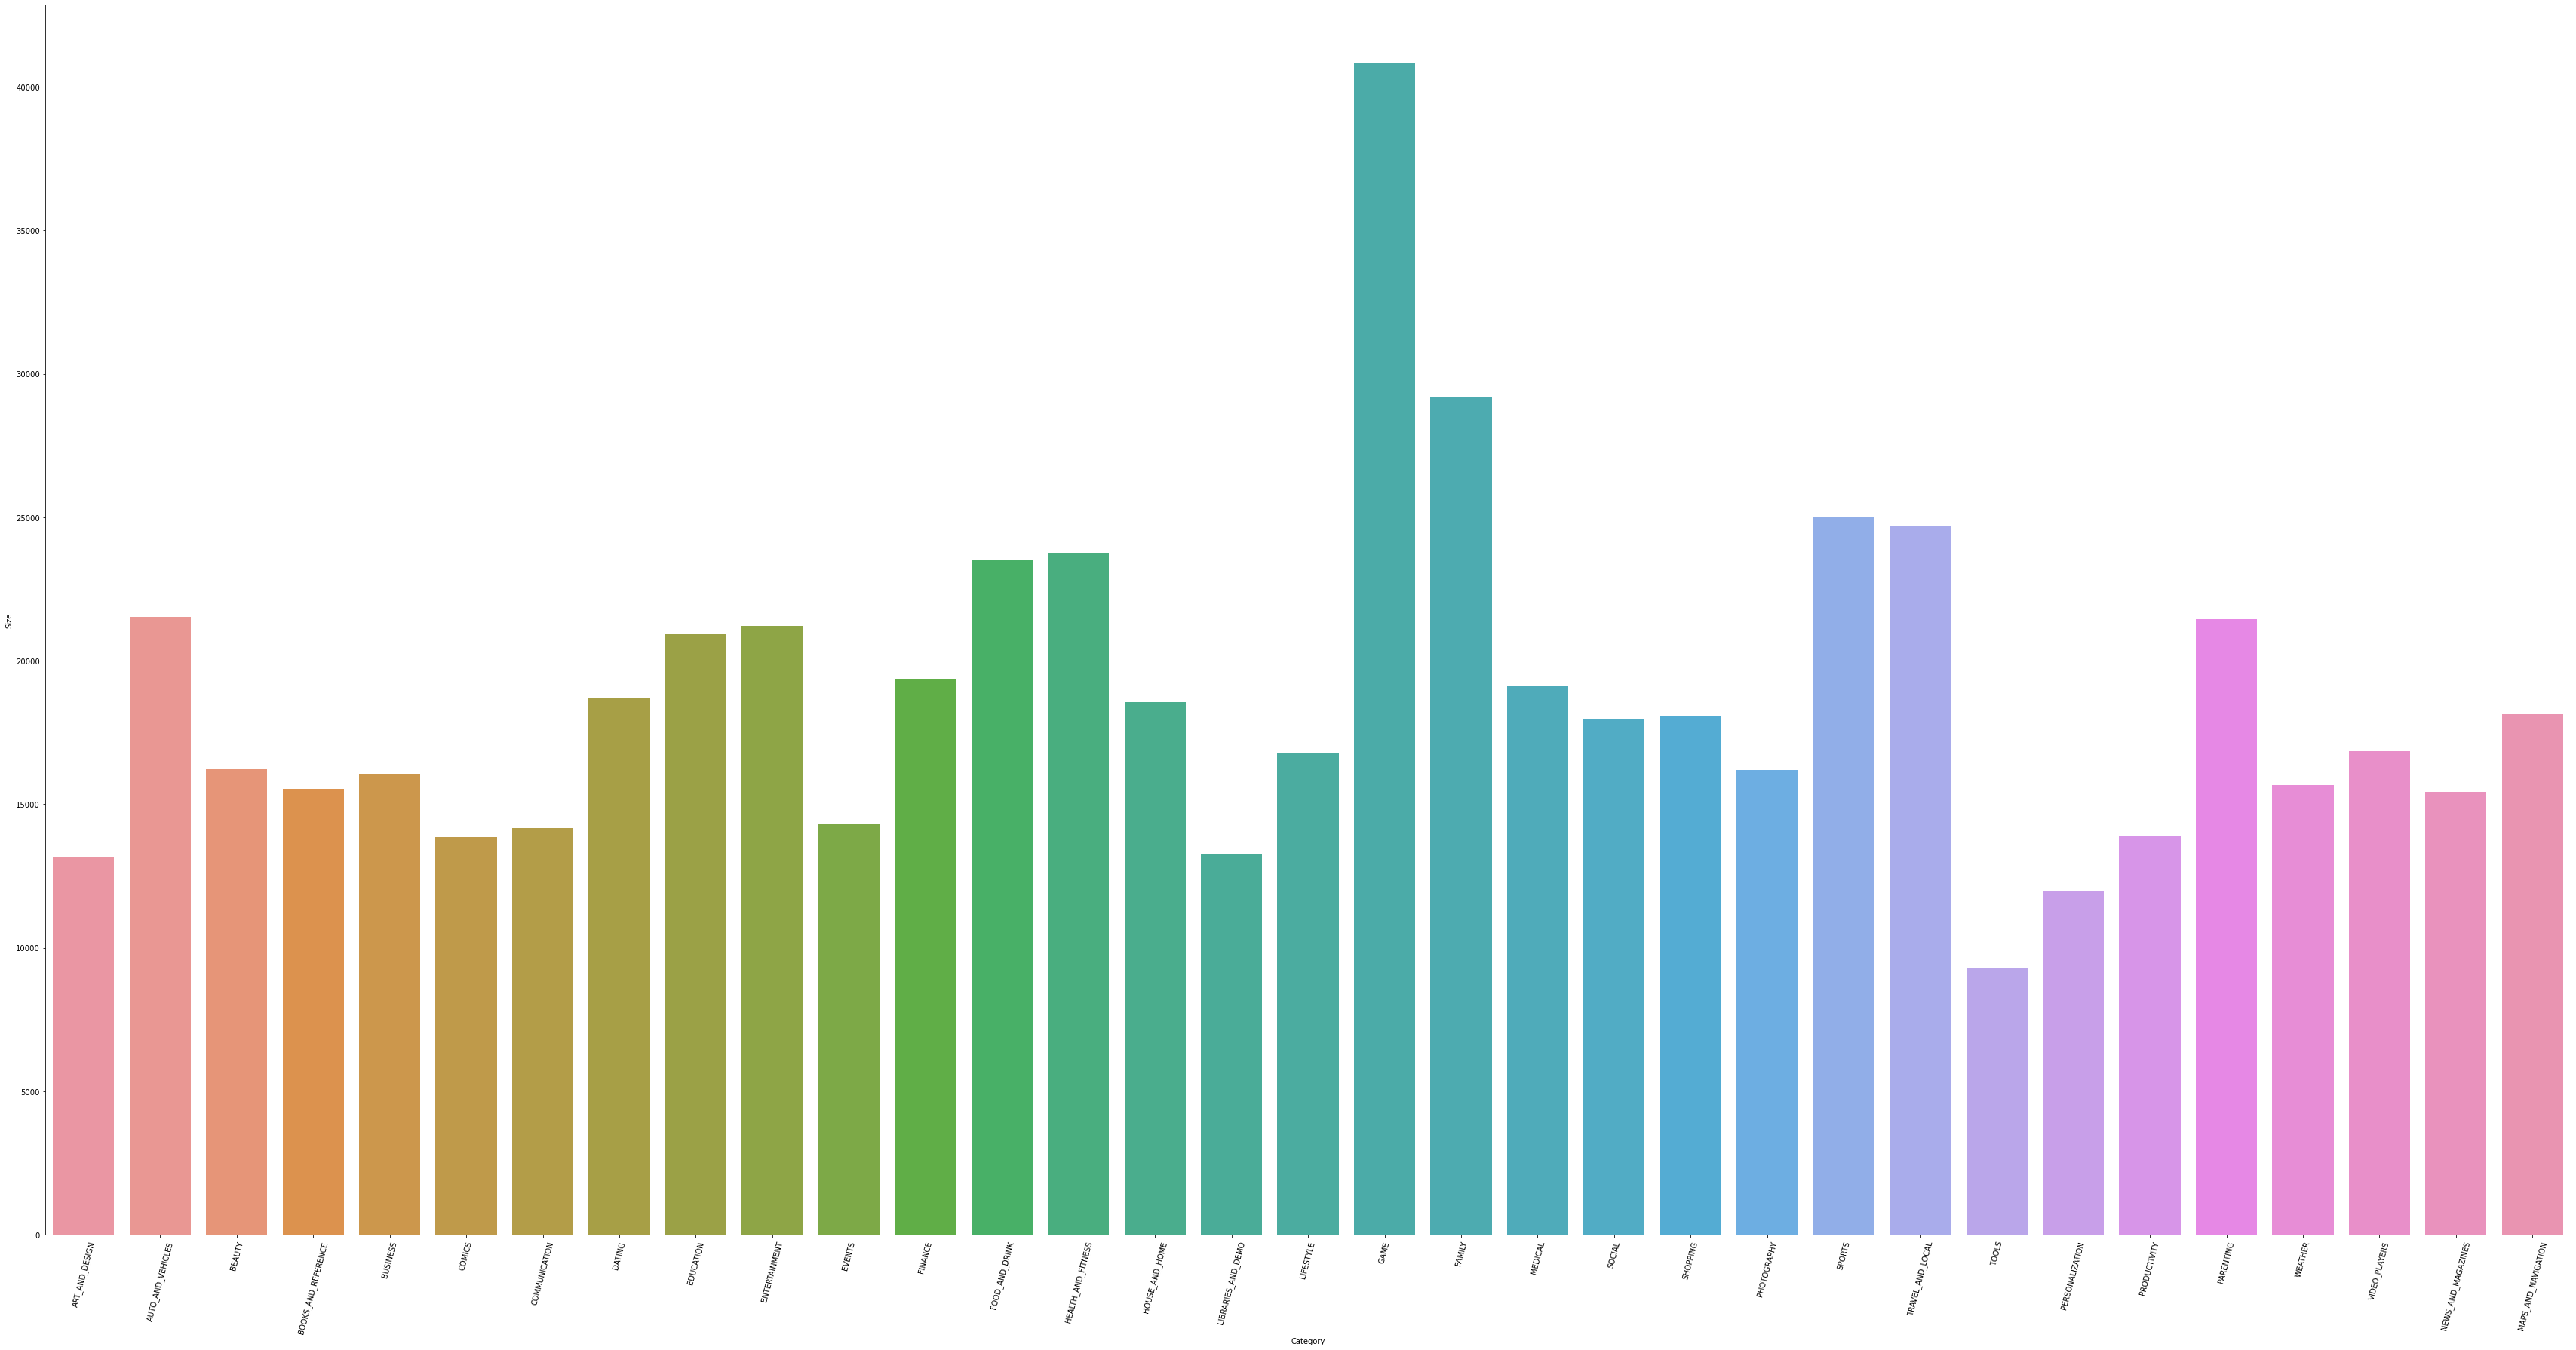

In [70]:
plt.figure(figsize=(60,30))                               # d-Plotting a barplot between Category and size
sns.barplot(x='Category',y='Size',ci=None,data=play9)
plt.xticks(rotation=75)
plt.show()

**As we can see above, apps in maximum categories have size around 20000 therefore we can say that lighter apps are more preferred.**